In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid

In [2]:
geo = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/ocean_geometry.nc", decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'})
temp = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/INPUT/11-27_NaN_SST.nc", decode_times=False)

In [6]:
geo

<xarray.Dataset> Size: 2MB
Dimensions:  (yh: 140, xh: 80, yq: 141, xq: 81)
Coordinates:
  * yh       (yh) float64 1kB -69.5 -68.5 -67.5 -66.5 ... 66.5 67.5 68.5 69.5
  * xh       (xh) float64 640B 0.5 1.5 2.5 3.5 4.5 ... 75.5 76.5 77.5 78.5 79.5
  * yq       (yq) float64 1kB -70.0 -69.0 -68.0 -67.0 ... 67.0 68.0 69.0 70.0
  * xq       (xq) float64 648B 0.0 1.0 2.0 3.0 4.0 ... 76.0 77.0 78.0 79.0 80.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 91kB ...
    geolonb  (yq, xq) float64 91kB ...
    geolat   (yh, xh) float64 90kB ...
    geolon   (yh, xh) float64 90kB ...
    D        (yh, xh) float64 90kB ...
    f        (yq, xq) float64 91kB ...
    ...       ...
    dyBu     (yq, xq) float64 91kB ...
    Ah       (yh, xh) float64 90kB ...
    Aq       (yq, xq) float64 91kB ...
    dxCvo    (yq, xh) float64 90kB ...
    dyCuo    (yh, xq) float64 91kB ...
    wet      (yh, xh) float64 90kB ...
Attributes:
    filename:  ./ocean_geometry.nc

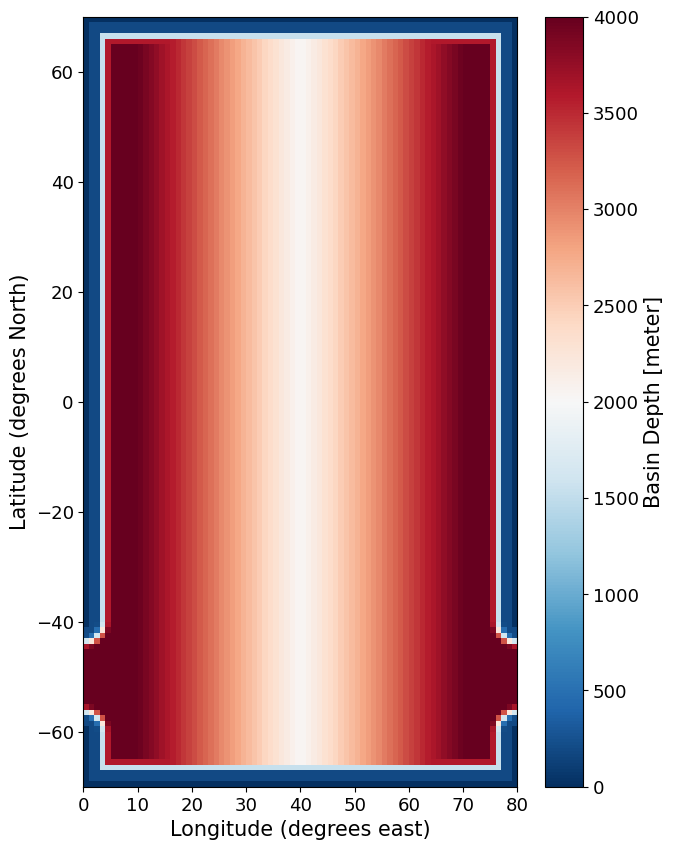

In [12]:
geo.D.plot(figsize=(7,10),cmap='RdBu_r')


plt.xlabel('Longitude (degrees east)', fontsize=15)
plt.ylabel('Latitude (degrees North)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)

# Increase colorbar fontsize and label
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar object
colorbar.ax.tick_params(labelsize=13)  # Adjust colorbar tick labels fontsize
colorbar.set_label('Basin Depth [meter]', fontsize=15)  # Set the colorbar label with fontsize


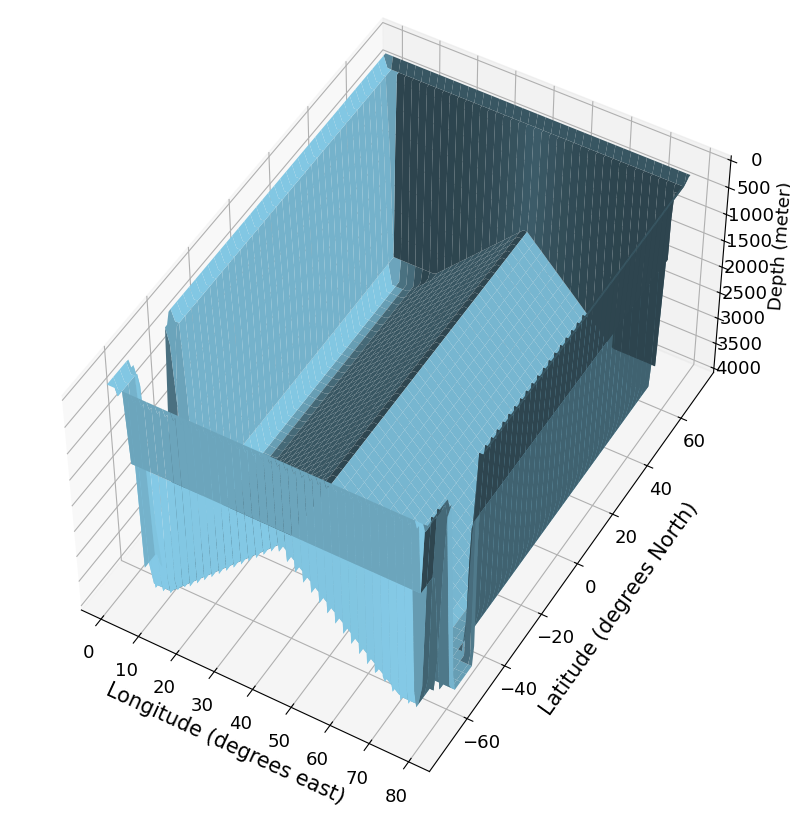

In [31]:
geo.D.plot.surface(size=10, aspect=2, color='skyblue')
plt.gca().invert_zaxis()
plt.gca().view_init(48)
plt.xlabel('Longitude (degrees east)', fontsize=15)
plt.ylabel('Latitude (degrees North)', fontsize=15, labelpad=15)
plt.gca().set_zlabel('Depth (meter)', fontsize=13, labelpad=7)  # Corrected this line
plt.tick_params(axis='both', which='major', labelsize=13)

# Adjusting the aspect ratio (narrower x-axis, longer y-axis)
plt.gca().set_box_aspect([1, 1.5, 0.8])  # Ratios for x, y, and z axes

plt.show()


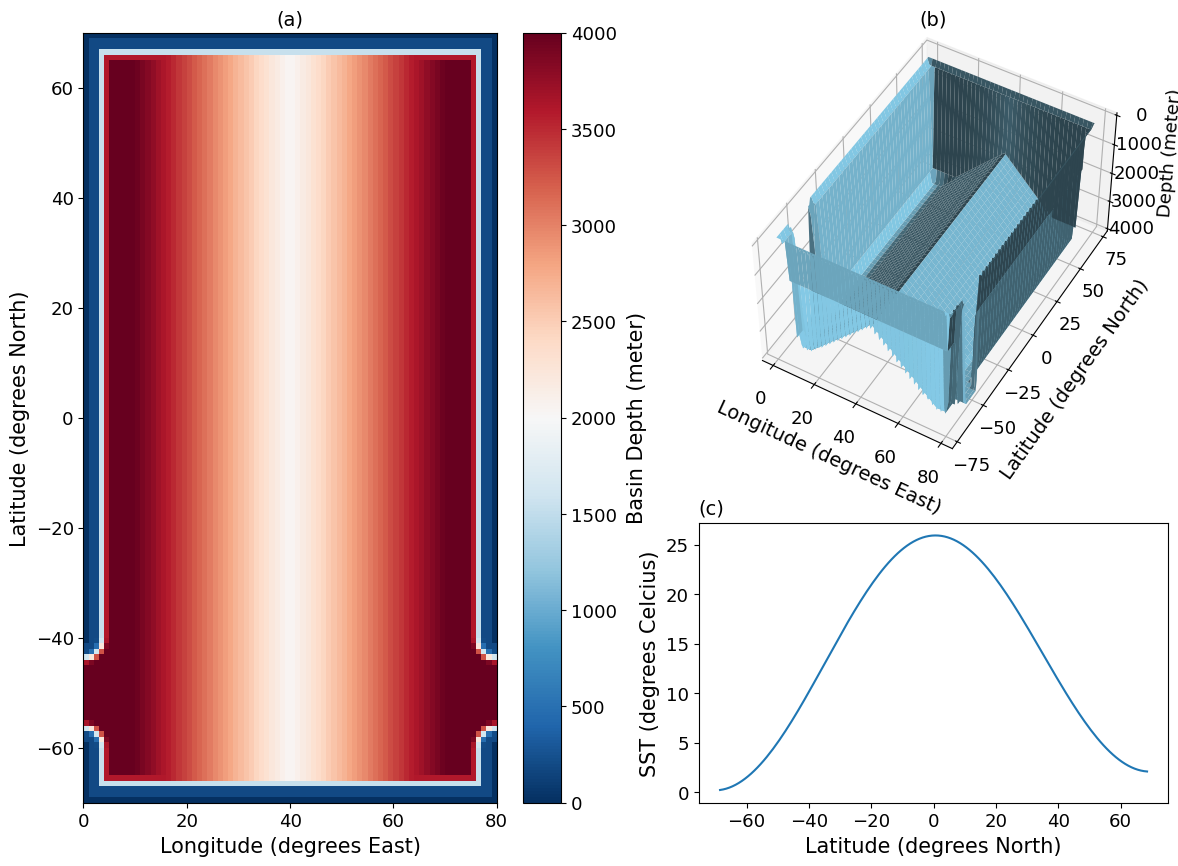

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.1, 1], height_ratios=[1.2, 0.8])

# --- Left column: Depth map ---
ax1 = fig.add_subplot(gs[:, 0])
geo.D.plot(ax=ax1, cmap='RdBu_r')
ax1.set_title('(a)', fontsize=14)
ax1.set_xlabel('Longitude (degrees East)', fontsize=15)
ax1.set_ylabel('Latitude (degrees North)', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=13)

# Colorbar customization
colorbar = ax1.collections[0].colorbar
colorbar.ax.tick_params(labelsize=13)
colorbar.set_label('Basin Depth (meter)', fontsize=15, labelpad=7)

# --- Top-right: 3D surface plot ---
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D projection is registered
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
geo.D.plot.surface(color='skyblue', ax=ax2)

ax2.invert_zaxis()
ax2.view_init(48)
ax2.set_title('(b)', fontsize=14)
ax2.set_xlabel('Longitude (degrees East)', fontsize=14)
ax2.set_ylabel('Latitude (degrees North)', fontsize=14, labelpad=15)
ax2.set_zlabel('Depth (meter)', fontsize=13, labelpad=6.5)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_box_aspect([1, 1.5, 0.8])  # Adjust aspect ratio

# --- Bottom-right: SST Line Plot ---
ax3 = fig.add_subplot(gs[1, 1])
temp.SST.mean('xh').plot(ax=ax3)

ax3.set_title('(c)', fontsize=14, loc='left')
ax3.set_xlabel('Latitude (degrees North)', fontsize=15)
ax3.set_ylabel('SST (degrees Celcius)', fontsize=15)
ax3.tick_params(axis='both', labelsize=13)

# plt.tight_layout()

plt.savefig('bathymetry.png')


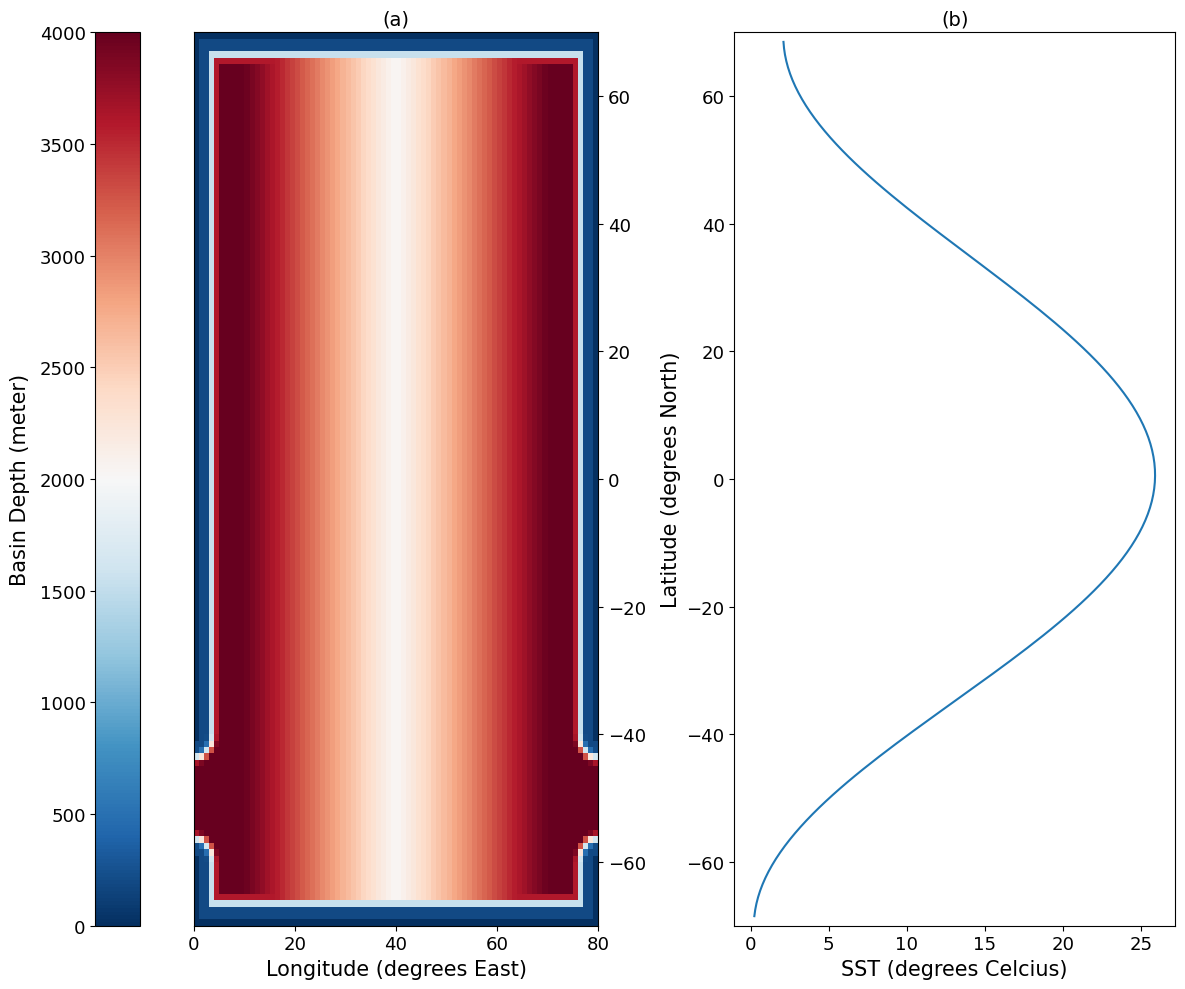

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.1, 0.9])

# --- Left column: Depth map ---
ax1 = fig.add_subplot(gs[0])
a=geo.D.plot(ax=ax1, cmap='RdBu_r', add_colorbar=False)
ax1.set_title('(a)', fontsize=14)
ax1.set_xlabel('Longitude (degrees East)', fontsize=15)
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.yaxis.tick_right()

# Colorbar customization
colorbar = fig.colorbar(a,ax=ax1, orientation='vertical', location='left')
colorbar.ax.tick_params(labelsize=13)
colorbar.set_label('Basin Depth (meter)', fontsize=15, labelpad=7)

# # --- Top-right: 3D surface plot ---
# from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D projection is registered
# ax2 = fig.add_subplot(gs[0, 1], projection='3d')
# geo.D.plot.surface(color='skyblue', ax=ax2)

# ax2.invert_zaxis()
# ax2.view_init(48)
# ax2.set_title('(b)', fontsize=14)
# ax2.set_xlabel('Longitude (degrees East)', fontsize=14)
# ax2.set_ylabel('Latitude (degrees North)', fontsize=14, labelpad=15)
# ax2.set_zlabel('Depth (meter)', fontsize=13, labelpad=6.5)
# ax2.tick_params(axis='both', which='major', labelsize=13)
# ax2.set_box_aspect([1, 1.5, 0.8])  # Adjust aspect ratio

# --- Bottom-right: SST Line Plot ---
ax3 = fig.add_subplot(gs[1])
temp.SST.mean('xh').plot(ax=ax3, y='yh')

ax3.set_title('(b)', fontsize=14)
ax3.set_ylim(-70,70)
ax3.set_ylabel('Latitude (degrees North)', fontsize=15)
ax3.set_xlabel('SST (degrees Celcius)', fontsize=15)
ax3.tick_params(axis='both', labelsize=13)

plt.tight_layout()

plt.savefig('bathymetry.png')
